In [1]:
import pandas as pd

In [2]:
# 천단위로 ,가 들어가있기 때문에 thousands=','로 구분해주어야 한다.
criminal_anal_police = pd.read_csv('data/02. crime_in_Seoul.csv', thousands=',', encoding='cp949')

In [3]:
criminal_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [4]:
# 관서를 구 별로 구분하는 작업
# 관서의 주소를 자동으로 구와 매핑할 수 있는 방법을 찾아야 함
# 구글의 API이용 -> geocoding API 이용
import googlemaps

In [5]:
gmaps_key="구글키"
gmaps = googlemaps.Client(key=gmaps_key) # 클라이언트 객체 생성

In [6]:
# 테스트
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [7]:
# 데이터값 = 중부서, geomaps=서울중부경찰서
# 데이터값을 geomaps에 맞게 수정
station_name=[]

for name in criminal_anal_police['관서명']:
    station_name.append('서울'+str(name[:-1])+'경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [8]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    item = gmaps.geocode(name, language='ko')
    station_address.append(item[0].get('formatted_address'))
    
    item_loc = item[0].get('geometry')
    station_lat.append(item_loc['location']['lat'])
    station_lng.append(item_loc['location']['lng'])
    
    print(name + '---- ' + item[0].get('formatted_address') +'lat = '+ str(item_loc['location']['lat']) + 'lng = '
          + str(item_loc['location']['lng']))

서울중부경찰서---- 대한민국 서울특별시 중구 을지로동 수표로 27lat = 37.5636465lng = 126.9895796
서울종로경찰서---- 대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46lat = 37.575548lng = 126.9847471
서울남대문경찰서---- 대한민국 서울특별시 중구 회현동 한강대로 410lat = 37.5547584lng = 126.9734981
서울서대문경찰서---- 대한민국 서울특별시 서대문구 충현동 통일로 113lat = 37.5647439lng = 126.9667705
서울혜화경찰서---- 대한민국 서울특별시 종로구 인의동 창경궁로 112-16lat = 37.5718529lng = 126.9989143
서울용산경찰서---- 대한민국 서울특별시 용산구 원효로1가 백범로 329lat = 37.5387099lng = 126.9659183
서울성북경찰서---- 대한민국 서울특별시 성북구 삼선동 보문로 170lat = 37.58977830000001lng = 127.016589
서울동대문경찰서---- 대한민국 서울특별시 동대문구 청량리동 약령시로21길 29lat = 37.58506149999999lng = 127.0457679
서울마포경찰서---- 대한민국 서울특별시 마포구 아현동 마포대로 183lat = 37.550814lng = 126.954028
서울영등포경찰서---- 대한민국 서울특별시 영등포구 영등포동1가 618-7lat = 37.5153176lng = 126.905728
서울성동경찰서---- 대한민국 서울특별시 성동구 행당동 왕십리광장로 9lat = 37.5617303lng = 127.0364217
서울동작경찰서---- 대한민국 서울특별시 동작구 노량진1동 노량진로 148lat = 37.5130866lng = 126.9428498
서울광진경찰서---- 대한민국 서울특별시 광진구 구의동 자양로 167lat = 37.542873lng = 127.083821
서울서부경찰서---- 대한민국 서울특별시 은평구 녹

In [9]:
criminal_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [10]:
# 구별이라는 컬럼을 만들고 각 경찰서의 주소를 이용하여 ~구 로 채우기
gu_name = []

for name in station_address:
    tmp = name.split()
    tmp_gu = [gu for gu in tmp if gu[-1]=='구'][0]
    gu_name.append(tmp_gu)
criminal_anal_police['구별'] = gu_name

In [11]:
criminal_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [12]:
criminal_anal_police.to_csv('data/crime_in_seoul_gu.csv', sep=',')

In [13]:
criminal_anal_police=pd.read_csv('data/crime_in_seoul_gu.csv', index_col=0)

In [14]:
criminal_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [15]:
import numpy as np

In [16]:
criminal_anal = pd.pivot_table(criminal_anal_police, index='구별', aggfunc=np.sum)

In [17]:
criminal_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [18]:
# 강간검거율, 강도검거율, 살인검거율, 절도검거율, 폭력검거율
criminal_anal['강간검거율'] = (criminal_anal['강간 검거']/criminal_anal['강간 발생']) * 100
criminal_anal['강도검거율'] = (criminal_anal['강도 검거']/criminal_anal['강도 발생']) * 100
criminal_anal['살인검거율'] = (criminal_anal['살인 검거']/criminal_anal['살인 발생']) * 100
criminal_anal['절도검거율'] = (criminal_anal['절도 검거']/criminal_anal['절도 발생']) * 100
criminal_anal['폭력검거율'] = (criminal_anal['폭력 검거']/criminal_anal['폭력 발생']) * 100

criminal_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [19]:
# 필요없는 컬럼 삭제
del criminal_anal['강간 검거']
del criminal_anal['강도 검거']
del criminal_anal['살인 검거']
del criminal_anal['절도 검거']
del criminal_anal['폭력 검거']

In [20]:
criminal_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [21]:
# 검거율이 100이 넘어가는 데이터를 모두 100으로 바꾼다.
col_list=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
for column in col_list:
    criminal_anal.loc[criminal_anal[column]>100,column]=100

In [22]:
criminal_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [23]:
# 컬럼명을 단축하기 위해 
criminal_anal.rename(columns={'강간 발생':'강간',
                     '강도 발생':'강도',
                     '살인 발생':'살인',
                     '절도 발생':'절도',
                     '폭력 발생':'폭력'}, inplace=True) # inplace는 반환

In [24]:
criminal_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [25]:
# 단위 편차가 크므로 데이터를 보기에 불편하다(살인은 한자리수, 절도는 천단위)
# 쉽게 한눈에 비교할 수 있도록 정교화 하는 작업 필요 => min-max scaling
from sklearn import preprocessing

In [26]:
col = ['강간','강도','살인','절도','폭력']

x = criminal_anal[col].values
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]], dtype=int64)

In [27]:
min_max_scsler = preprocessing.MinMaxScaler()

x_scaled = min_max_scsler.fit_transform(x.astype(float)) # 한 행에 대해 정규화를 시키고 float 타입으로 변환
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [28]:
# 정규화된 값 다시 불러오기
criminal_anal_norm = pd.DataFrame(x_scaled, columns=col, index=criminal_anal.index)

In [29]:
criminal_anal_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479


In [30]:
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
criminal_anal_norm[col2]=criminal_anal[col2]
criminal_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [31]:
result_CCTV = pd.read_csv('data/CCTV_result.csv', index_col='구별')

In [32]:
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [33]:
# result_CCTV의 인구수, 소계 컬럼을 criminal_anal_norm의 인구수와 CCTV 컬럼으로 가져오기
criminal_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
criminal_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [34]:
# col = ['강간','강도','살인','절도','폭력']
# criminal_anal_norm['범죄']=np.sum(criminal_anal_norm[col], axis=1) # axis=1 열을 의미 axis=0 행을 의미
criminal_anal_norm['범죄']=criminal_anal_norm['강간']+criminal_anal_norm['강도']+criminal_anal_norm['살인']+criminal_anal_norm['절도']+criminal_anal_norm['폭력']

# col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
# criminal_anal_norm['검거']=np.sum(criminal_anal_norm[col2], axis=1)
criminal_anal_norm['검거']=criminal_anal_norm['강간검거율']+criminal_anal_norm['강도검거율']+criminal_anal_norm['살인검거율']+criminal_anal_norm['절도검거율']+criminal_anal_norm['폭력검거율']

criminal_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


In [35]:
criminal_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.204979,416.915211
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.603930,325.647079
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.666924,423.928929
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.905445,383.477292


In [36]:
# 데이터 시각화
import platform
from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Matplotlib is building the font cache; this may take a moment.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\BIT\anaconda3\envs\kjh-3.7-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT\anaconda3\envs\kjh-3.7-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


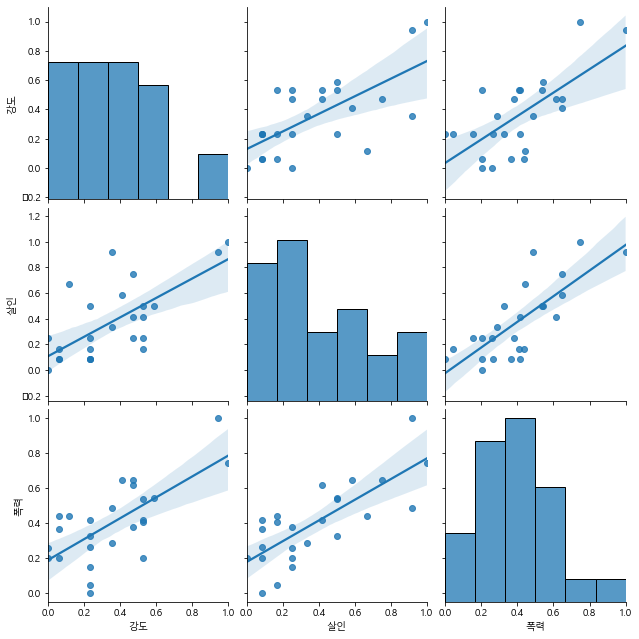

In [38]:
sns.pairplot(criminal_anal_norm, vars=['강도','살인','폭력'], kind='reg', height=3)
plt.show()
# 겹쳐지는 곳은 히스토그램이고 안겹치는 부분은 둘의 상관 간계를 나타낸다.

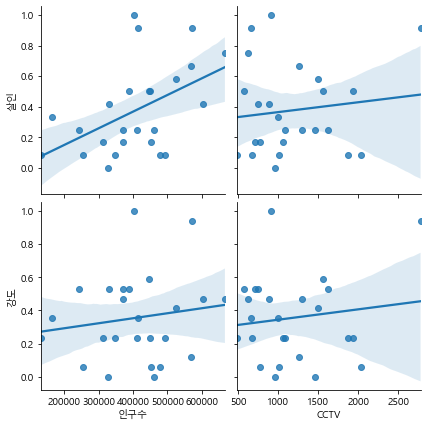

In [39]:
sns.pairplot(criminal_anal_norm, x_vars=['인구수','CCTV'], y_vars=['살인','강도'], kind='reg', height=3)
plt.show()

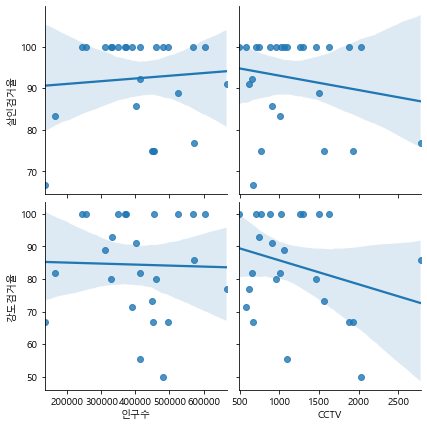

In [40]:
sns.pairplot(criminal_anal_norm, x_vars=['인구수','CCTV'], y_vars=['살인검거율','강도검거율'], kind='reg', height=3)
plt.show()

In [41]:
tmp_max = criminal_anal_norm['검거'].max() # 검거라는 컬럼에서 max값을 구한다.
criminal_anal_norm['검거']=criminal_anal_norm['검거'] / tmp_max * 100 # 검거값이 제일 높은 값이 100이되고 나머지는 상태값으로 나타나진다.
criminal_anal_norm_sort=criminal_anal_norm.sort_values(by='검거', ascending=False)
criminal_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


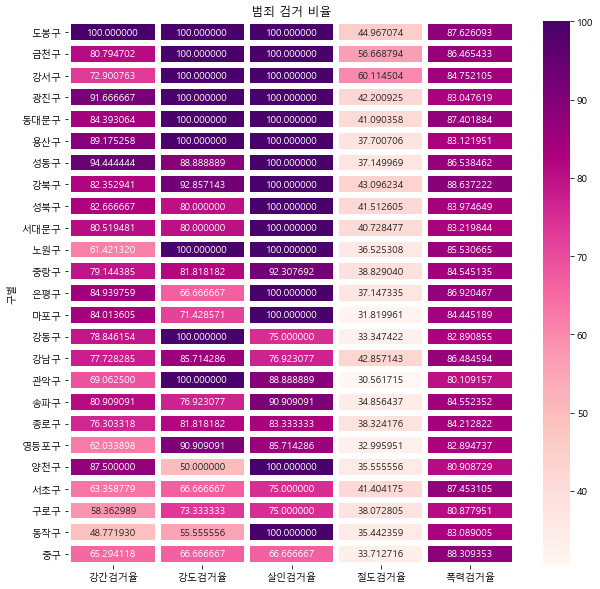

In [42]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(criminal_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=5, cmap='RdPu')
plt.title('범죄 검거 비율')
plt.show()

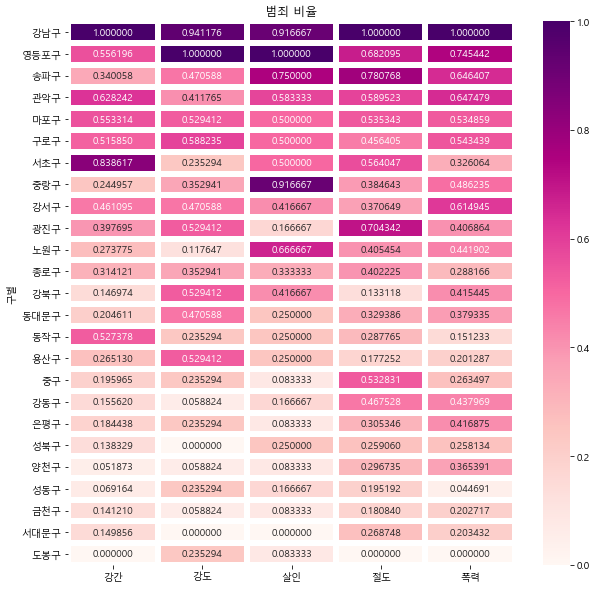

In [43]:
target_col = ['강간','강도','살인','절도','폭력']
criminal_anal_norm['범죄'] = criminal_anal_norm['범죄']/5
criminal_anal_norm_sort = criminal_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(criminal_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=5, cmap='RdPu')
plt.title('범죄 비율')
plt.show()

In [44]:
criminal_anal_norm.to_csv('data/crime_final.csv', sep=',')

In [45]:
import folium # 지도 시각화 도구

In [46]:
map=folium.Map(location=[45.5236, -122.6750])

In [47]:
map

In [48]:
map=folium.Map(location=[45.5236, -122.6750], zoom_start=13) # 최초 비율 설정
map

In [49]:
map=folium.Map(location=[45.5236, -122.6750], zoom_start=13, tiles='StamenToner') # 최초 비율 설정
map

In [50]:
map = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', icon=folium.Icon(icon='cloud')).add_to(map)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', icon=folium.Icon(icon='cloud')).add_to(map)
map

In [51]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12, 
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3300, -121.6823], popup='Some Other Location', 
              icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)
map_1

In [52]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                   zoom_start=13)
folium.Marker([45.5244, -122.6699], popup='The Waterfront' ).add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50, 
                    popup='Laurelhurst Park', color='#3186cc', 
                    fill_color='#3186cc', ).add_to(map_2)
map_2

In [53]:
map_5 = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
folium.RegularPolygonMarker([45.5012, -122.6655], 
                            popup='Ross Island Bridge', fill_color='#132b5e', 
                            number_of_sides=3, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5132, -122.6708], 
                            popup='Hawthorne Bridge', fill_color='#45647d', 
                            number_of_sides=4, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5275, -122.6692], 
                            popup='Steel Bridge', fill_color='#769d96', 
                            number_of_sides=6, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5318, -122.6745], 
                            popup='Broadway Bridge', fill_color='#769d96', 
                            number_of_sides=8, radius=10).add_to(map_5)
map_5

In [54]:
state_unemployment = 'data/folium_US_Unemployment_Oct2012.csv'
state_data=pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [55]:
state_geo = 'data/folium_us-states.json'

map=folium.Map(location=[40,-98], zoom_start=4)
folium.Choropleth(geo_data=state_geo,data=state_data
                  , columns=['State','Unemployment']
                 , key_on='feature.id'
                 ,fill_color='YlGn'
                 , legend_name='Unmployment Rate (%)').add_to(map)

In [56]:
map

In [57]:
import json

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [58]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_str,
               data = criminal_anal_norm['살인'],
               columns = [criminal_anal_norm.index, criminal_anal_norm['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)
map

In [59]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_str,
               data = criminal_anal_norm['강간'],
               columns = [criminal_anal_norm.index, criminal_anal_norm['강간']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)
map

In [60]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_str,
               data = criminal_anal_norm['범죄'],
               columns = [criminal_anal_norm.index, criminal_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)
map

In [61]:
tmp_criminal = criminal_anal_norm['범죄'] / criminal_anal_norm['인구수']*1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [criminal_anal_norm.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)
map

In [62]:
criminal_anal_police=pd.read_csv('data/crime_in_seoul_gu.csv', index_col=0)
criminal_anal_police

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
5,용산서,5,5,14,14,194,173,1557,587,2050,1704,용산구
6,성북서,2,2,2,1,86,71,953,409,1194,1015,성북구
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227,동대문구
8,마포서,8,8,14,10,294,247,2555,813,2983,2519,마포구
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961,영등포구


In [63]:
#  검거율 / 범죄율
criminal_anal_police['lat'] = station_lat
criminal_anal_police['lng'] = station_lng

col=['살인 검거','강도 검거','강간 검거','절도 검거','폭력 검거']
tmp=criminal_anal_police[col] / criminal_anal_police[col].max()

criminal_anal_police['검거'] = np.sum(tmp, axis=1)
criminal_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966770,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [64]:
# 경찰서 위치
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
for n in criminal_anal_police.index:
    folium.Marker([criminal_anal_police['lat'][n], 
                   criminal_anal_police['lng'][n]]).add_to(map)
map

In [65]:
# 경찰서마다 검거율이 얼마다 되는지 원의 크기로 볼 수있다.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
for n in criminal_anal_police.index:
    folium.CircleMarker([criminal_anal_police['lat'][n], criminal_anal_police['lng'][n]], 
                        radius = criminal_anal_police['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
map

In [66]:
# 범죄 발생 빈도율과 검거율을 한눈에 보기
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
folium.Choropleth(geo_data = geo_str,
               data = criminal_anal_norm['범죄'],
               columns = [criminal_anal_norm.index, criminal_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id').add_to(map)
for n in criminal_anal_police.index:
    folium.CircleMarker([criminal_anal_police['lat'][n], criminal_anal_police['lng'][n]], 
                        radius = criminal_anal_police['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
map